<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Project5/ImgNormalizationv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the 3rd_DNN, with convolution layers of 10, 16, 10 (1x1), maxpool, 16, 16, 16, 10(1x1), batch normalization and dropouts(0.1) at each convolution layer has resulted in 12K parameters, 99.23% accuracy with 16 epochs.

Now, Experiment with 

1. Define custom learning rate procedure linked to epoch. Also, add customize the optimizer learning rate.

2. Increase the batch size.

Observations:

Accuracy pf 99.40% at epoch 19 with batch size of 32

Accuracy pf 99.41% at epoch 19 with batch size of 64

Accuracy pf 99.4% at epoch 28 with batch size of 128

Accuracy of <99.4% even after 50 epochs with batch size of 256.

As the batch size increases, the epochs should be increased to achieve 99.4% validation accuracy.


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


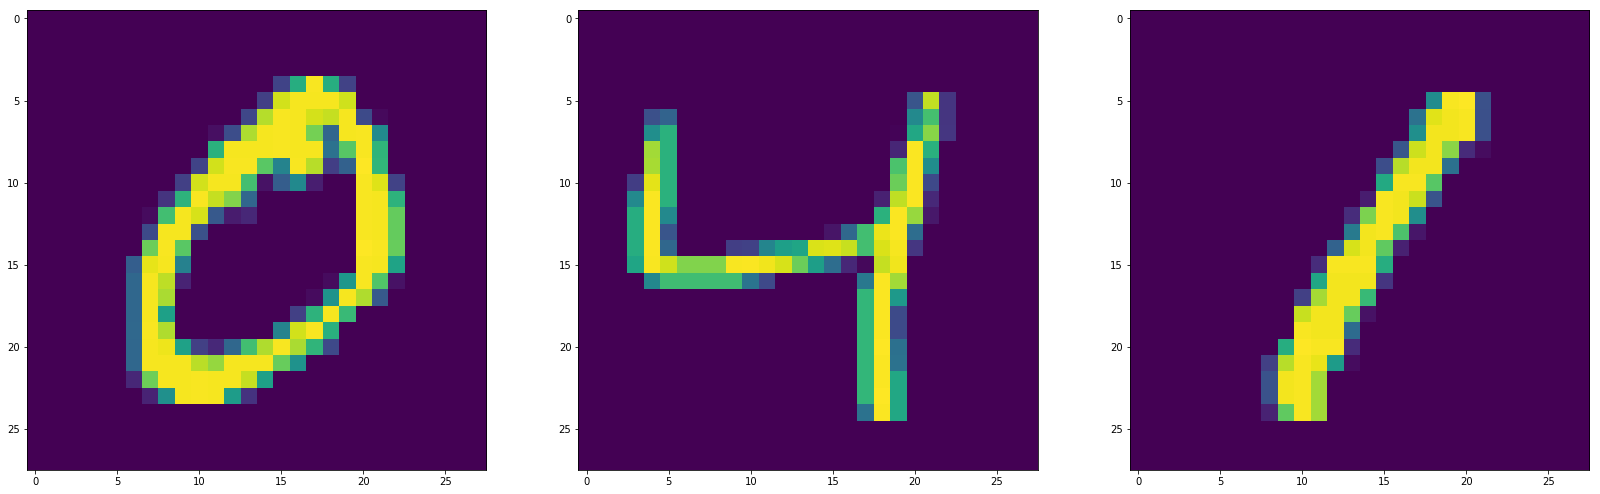

In [0]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
#plt.imshow(X_train[0])

#for i in range(10):
#  plt.imshow(X_train[i])
#plt.show()

# print the X_train in the columns x row matrix
fig=plt.figure(figsize=(28, 28))
columns = 3
rows = 1
for i in range(1, columns*rows +1 ):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

X1_test = X_test

Reshape function changes the 2 dimensional image to 3 dimension.

In [0]:
print(y_train[0])
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


5


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # receptive field = 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1,1, activation='relu')) #6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` cal

In [0]:
model.summary()
model.layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)        170       
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import math
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

drop = 0.8 # drop of the learning rate after epochs_drop
epochs_drop= 1.0 # number of epochs after which learning rate should drop
intialrate = 0.003 #intial learning rate
def step_decay(epoch):
  lrate = intialrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  #decay_rate.append(lrate)
  return lrate
  

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 25s 423us/step - loss: 0.1630 - acc: 0.9490 - val_loss: 0.0493 - val_acc: 0.9840
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 23s 379us/step - loss: 0.0648 - acc: 0.9795 - val_loss: 0.0381 - val_acc: 0.9874
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 23s 377us/step - loss: 0.0511 - acc: 0.9840 - val_loss: 0.0305 - val_acc: 0.9898
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 24s 395us/step - loss: 0.0446 - acc: 0.9856 - val_loss: 0.0263 - val_acc: 0.9917
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.020227363890374547, 0.9935]


In [0]:
y_pred = model.predict(X_test)

[7 2 1 0 4 1 4 9 5] (10000,) 7
[7 2 1 0 4 1 4 9 5] (10000,) 7


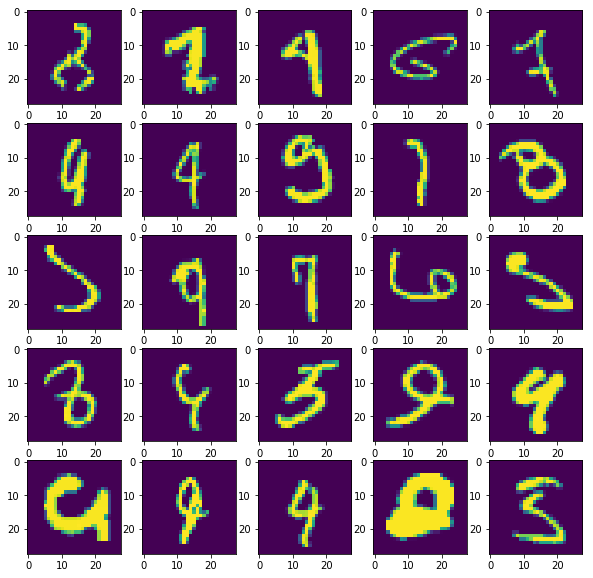

In [0]:
import numpy as np

#generate the array of predicted labels of the images. - new_y_pred
#y_test is the label for each image in X_test (reshaped) or X1_test (before reshaping)
y_pred1 = np.rint(y_pred) # round the values to either 0 or 1.
array_new_y_pred = y_pred1.argmax(1) # create the 1-d array similar to y_test

#compare the arrays array_new_y_pred and y_test and find the missing elements. The print the missing elements from X1_test
missed_images = []
for x in range(len(array_new_y_pred)):
  if array_new_y_pred[x] != y_test[x]:
    #print(x, y_test[x], array_new_y_pred[x])
    missed_images.append(X1_test[x])

print(array_new_y_pred[:9], array_new_y_pred.shape, array_new_y_pred[0])
print(y_test[:9], y_test.shape, y_test[0])
#print(missed_images[0])

# print the X_train in the columns x row matrix
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, columns*rows +1 ):
    img = missed_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

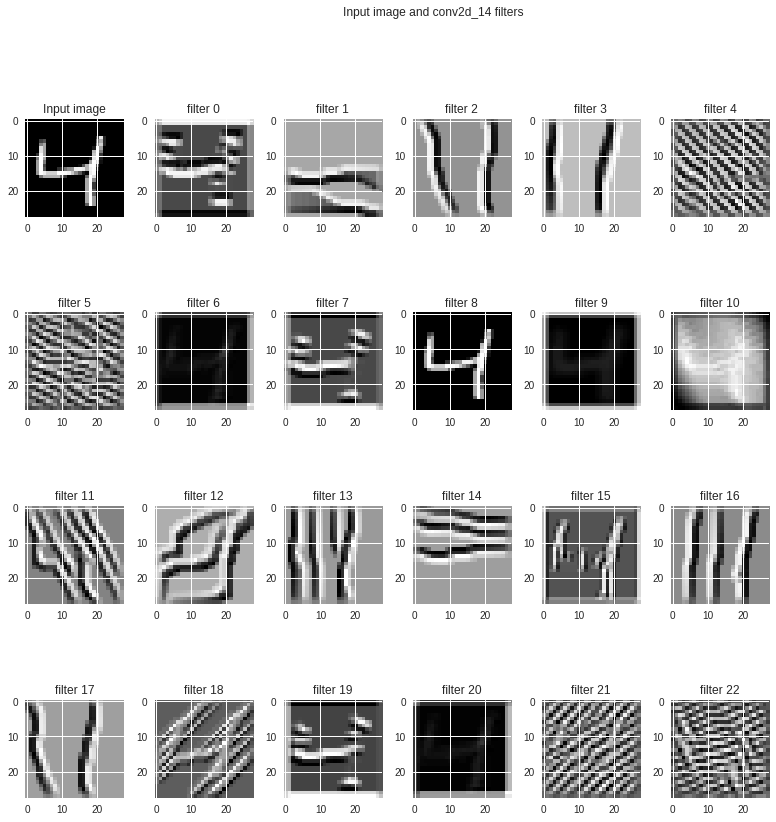

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()